In [4]:
import pandas as pd
from conf import DATA_DIR, ASSETS_DIR
from utils import compute_cohen_on_pandas_columns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
onion_bin_to_compare = pd.read_csv(DATA_DIR + 'onion_bin_to_compare.csv')
emma_bin_to_compare = pd.read_csv(DATA_DIR + 'emma_bin_to_compare.csv')

In [6]:
gems_9 = ['wond', 'tran', 'tend', 'nost', 'peac', 'joya', 'ener', 'sadn', 'tens']

Emotion-wise Cohen's Kappa

In [7]:
onion_bin_to_compare

,song_code,wond,tran,tend,nost,peac,joya,ener,sadn,tens,title,artist,genre
0,6aKbiXwwBszPw6HM,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Find (Andy Moor Remix),Ridgewalkers,trance
1,EtYe8YWsGvZmeRYM,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Alchemy,Above & Beyond,trance
2,04q3VppIQEET5rzy,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Synaesthesia (Fly Away) - Radio Edit,The Thrillseekers,trance
3,8BjY1ZEA6OnEoUYk,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,R.I.P.,September,trance
4,jyMudL0rTgO4ecto,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Build The Cities (feat. Kerli),Karma Fields,trance
...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,x9iYvZSa8hQpBgHJ,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Tropicalia,Beck,nova
449,2RgPyroR10XSHhEt,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,"Mas, Que Nada!",Jorge Ben Jor,nova
450,y1Vp4R9jiSUAVnMP,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Agua De Beber,Astrud Gilberto,nova
451,x2aYFIYlehHBrA32,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Know You Now,Amy Winehouse,nova


In [15]:
onion_bin_to_compare[onion_bin_to_compare.song_code == song_code][gems_row].values == 1.

array([ True])

In [17]:
confusion_matrix = np.zeros(shape=(9, 9))
for row, gems_row in enumerate(gems_9):
    for column, gems_column in enumerate(gems_9):
        for song_code in onion_bin_to_compare.song_code.values:
            if onion_bin_to_compare[onion_bin_to_compare.song_code == song_code][gems_row].values == 1:
                if emma_bin_to_compare[emma_bin_to_compare.song_code == song_code][gems_column].values == 1:
                    confusion_matrix[row, column] += 1

In [18]:
confusion_matrix

array([[ 37.,  28.,  44.,  70.,  45.,  77.,  59.,  17.,  23.],
       [ 80.,  49., 101., 131., 124., 119.,  75.,  39.,  25.],
       [113.,  62., 144., 211., 153., 198., 144.,  54.,  38.],
       [ 40.,  32.,  58.,  84.,  66.,  58.,  55.,  31.,  25.],
       [ 59.,  36.,  83., 100.,  93.,  68.,  34.,  30.,   8.],
       [ 79.,  47.,  78., 137.,  83., 194., 143.,  24.,  35.],
       [ 23.,  19.,  26.,  49.,  24.,  52.,  54.,  15.,  17.],
       [ 33.,  20.,  48.,  56.,  49.,  34.,  31.,  35.,  12.],
       [  5.,   1.,   5.,  11.,   6.,  15.,  16.,   2.,  10.]])

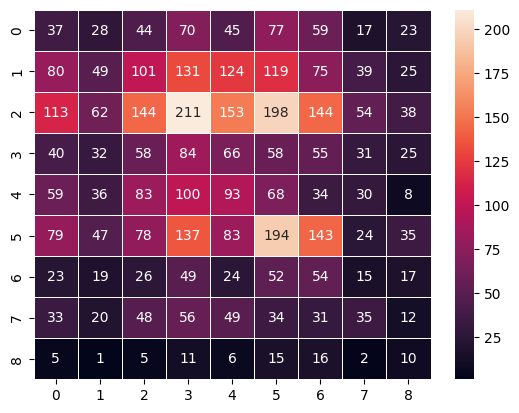

In [21]:
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(confusion_matrix, linewidth=0.5, annot=True, fmt='g')
plt.show()